<a href="https://colab.research.google.com/github/husfuu/Mathematical-Modelling/blob/main/Optimization/Spiral%20Algorithm/Spiral_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spiral Optimization Algorithm

## Introduction

Algoritma optimisasi spiral merupakan algoritma pencarian titik lokasi minumum dengan menggunakan prinsip rotasi spiral. Algoritma ini pertama kali diperkenalkan oleh (Tamura dan Yasuda, 2011) dan aplikasinya banyak diterapkan dan dikembangkan oleh (Sidarto dan Kania, 2015).


Misal diketahui fungsi tujuan
$$ \textbf{min} f(\textbf{x})$$
dengan $\textbf{x} \in \mathbb{R}^2$


Berikut adalah algoritma optimisasi spiral

**Input** : 
1. $m$ ( $m \geq 2$ ) banyak titik awal
2. $\theta$ ($0 < \theta< 2\pi$ ) sudut rotasi 
3. $r$ ($0 < r < 1$) rasio
4. $k_{max}$ banyak iterasi 

Berikut adalah langkah-langkahnya
1. **Langkah 1**:
Tentukan banyaknya titik pencarian sebanyak $m$. Kemudian inisiasi iterasi $k = 0$.

2. **Langkah 2**:
Tentukan pusat rotasi awal $\textbf{x}^*$ dengan
 $$\textbf{x}^* = \textbf{x}_{i_{min}} \text{dengan  }  i_{min} =\text{argmin}f(\textbf{x}_i(0))$$
untuk $i = 1, 2, 3, \cdots ,  m$. 

3. **Langkah 3**:
Perbaharui 
$$\textbf{x}_i (k+1) = S(r, \theta)\textbf{x}_i (k) − (S(r, \theta) − I_2)\textbf{x}^*, $$
untuk $i = 1, 2, 3, \cdots ,  m$. 

4. **Langkah 4**:
Perbaharui $\textbf{x}^*$
$$\textbf{x}^* = \textbf{x}_{i_{min}} \text{dengan  }  i_{min} =\text{argmin}f(\textbf{x}_i(k+1))$$
untuk $i = 1, 2, 3, \cdots ,  m$.


5. **Langkah 5**:
Jika $k = k_{max}$ maka proses dihentikan. Jika tidak, tetapkan $k = k+1$ dan ulangi ke Langkah 3.

**Output**:
$\textbf{x}^*$ adalah titik minimum dari $f (x)$.

## Implementation

* function
$$ f(x,y) = x^3 + y^3 -3xy + 4 $$
* local minimum point
$$ (x, y) = (1, 1)$$
* result
$$ min f(x, y) = 3$$

### Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

In [2]:
def spiralMatrix(r, theta):
    A = r * np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta), np.cos(theta)]])
    return A

In [3]:
#Untuk kebutuhan ilustrasi saja
def plotArrow(x, color='red', label='vec'):
    plt.arrow(0, 0, x[0], x[1], fc=color, ec=color, head_width = 0.05, label=label)
    
def scat(x, color='tab:red'):
    plt.scatter(x[0],x[1], color=color)
    
def line(x1,x2):
    plt.plot([x1[0],x2[0]], [x1[1],x2[1]], ':', color="tab:blue")

In [4]:
def minima2d(x, y):
  z = x**3 + y**3 - 3*x*y + 4
  return z

Text(6, 6, 'Lokasi minimum')

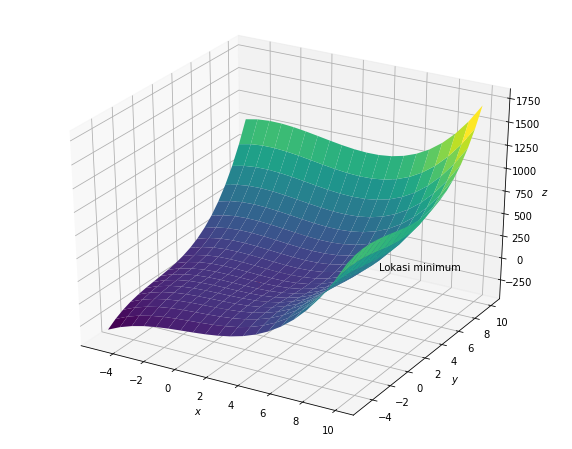

In [7]:
fig = plt.figure(figsize=(10, 8))
ax = fig.gca(projection='3d')

x = np.linspace(-5, 10, 20)
y = np.linspace(-5, 10, 20)

X, Y = np.meshgrid(x, y)
Z = minima2d(X, Y)

ax.plot_surface(X, Y, Z, cmap=cm.viridis, rstride=1, cstride=1)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.scatter(1, 1, 3, s=30, color='tab:red')
ax.text(6, 6, 3, 'Lokasi minimum')



https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html


## Input

In [8]:
m = 10
theta = np.pi/4
r = 0.95
kmax = 50

r = 0.95
S = spiralMatrix(r, theta)

In [9]:
S

array([[ 0.67175144, -0.67175144],
       [ 0.67175144,  0.67175144]])

### Langkah 1
Membuat/membangkitkan titik awal pencarian pada domain pencarian. Dalam hal ini,
$$ D = \left\{(x,y) \ | \ -4\leq x \leq 4, -4\leq y \leq 4  \right\} $$

(-4.0, 4.0, -4.0, 4.0)

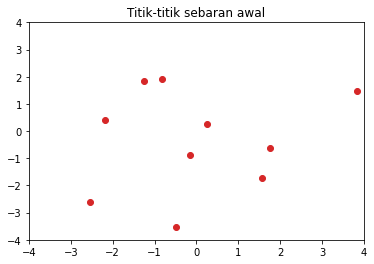

In [10]:
np.random.seed(123)
xi = np.random.uniform(-4,4,size=(m,2))

plt.title("Titik-titik sebaran awal")
for i in range(len(xi)):
    scat(xi[i])
plt.axis([-4, 4,-4, 4])

### Langkah 2
Menentukan titik pusat rotasi awal

In [11]:
z = minima2d(xi[:,0],xi[:,1])
idx = np.argmin(z)
xs = xi[idx]

In [12]:
xs

array([-2.54006616, -2.59638595])

In [13]:
z

array([ 10.94216256,  -3.67401873,  12.41975967,  47.06580194,
         2.95861506,  15.07459979, -45.02195386,  15.01825974,
       -49.67612964,   3.83978174])

Text(-2.540066156372, -2.5963859508200597, 'lokasi titik minimum')

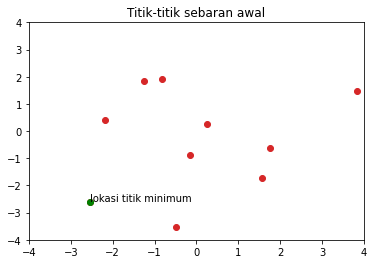

In [14]:
np.random.seed(123)
xi = np.random.uniform(-4,4,size=(m,2))

plt.title("Titik-titik sebaran awal")
for i in range(len(xi)):
    scat(xi[i])
scat(xs, 'green')
plt.axis([-4,4,-4,4])
plt.text(xs[0], xs[1], "lokasi titik minimum")

### Langkah 3 dan Langkah 4

In [15]:
k = 0
while k < kmax:
    for i in range(len(xi)):
        #Langkah 3
        xin = np.matmul(S, xi[i]) - np.matmul(S - np.eye(2), xs)
        xi[i] = xin #x(k+1)
    #Langkah 4
    z = minima2d(xi[:,0], xi[:,1])
    idx = np.argmin(z)
    xs = xi[idx]
        
        
    k = k + 1

In [16]:
xs

array([-32.63710695,  25.41035282])

(-40.0, 32.0, -32.0, 32.0)

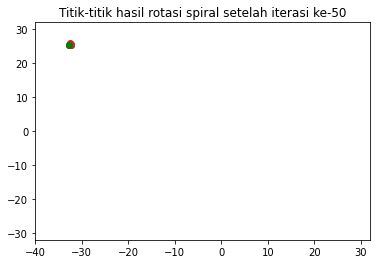

In [23]:
plt.title("Titik-titik hasil rotasi spiral setelah iterasi ke-" + str(kmax))
for i in range(len(xi)):
    scat(xi[i])
scat(xs, 'green')
plt.axis([-40, 32, -32, 32])